### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Specify Parameters

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
M = 30;    # window length = embedding dimension
N = 200;   # length of generated time series
T = 22;    # period length of sine function
stdnoise = 1; # noise-to-signal ratio

### Create Time Series and Plot

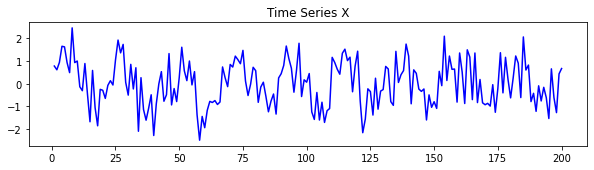

In [3]:
t = np.linspace(1, N, N)
X = np.sin(2*np.pi*t/T);
noise = stdnoise * np.random.randn(len(X))
X = X + noise
X = X - np.mean(X);            # remove mean value
X = X/np.std(X);             # normalize to standard deviation 1

plt.subplot(2,1,1)
plt.title("Time Series X")
plt.plot(t, X, 'b-');

### Anti-Diagonal Averaging Function

In [4]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

### Calculate Covariance Matrix (Hankel)

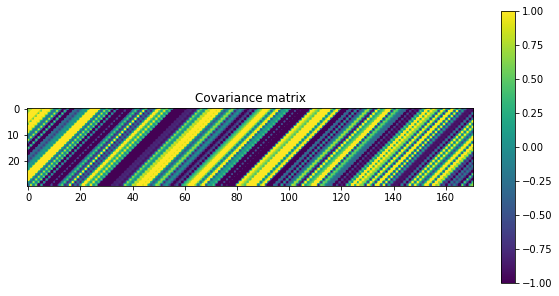

In [14]:
K = N - M + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
C = np.column_stack([X[i:i+M] for i in range(0,K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive. 

fig, ax = plt.subplots()
plt.title('Covariance matrix');
plt.imshow(C);
#axis square
plt.clim(-1, 1); # Set Color limit of colorbar
plt.colorbar(); # Add colorbar
plt.show()

### Apply SVD and Calculate the Elementary Matrices

In [16]:
d=10
U, Sigma, V = np.linalg.svd(C, full_matrices=False)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

NameError: name 'y' is not defined

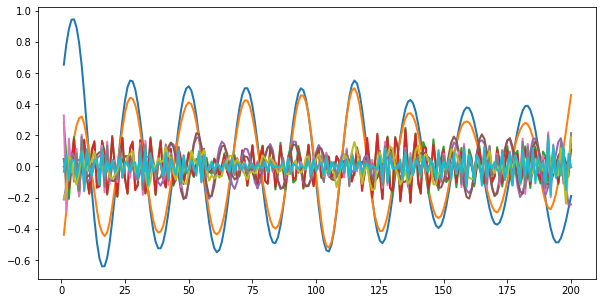

In [17]:
fig = plt.subplot()
for i in range(d):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(t, F_i, lw=2)

fig.axes.plot(t, y, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(d)] + ["$F$"]
fig.set_title("SVD decomposition")
fig.legend(legend, loc=(1.05,0.1));